In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from keras.applications.efficientnet import preprocess_input

import os
import cv2
from os import walk
import glob as gb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
SEED = 1000
IMG_SIZE = 224
BATCH_SIZE = 32

TRAIN_DIR = '../input/caltech-zipped/Caltech Bird 2/Train'
VALID_DIR = '../input/caltech-zipped/Caltech Bird 2/Validation'
TEST_DIR = '../input/caltech-zipped/Caltech Bird 2/Test'

In [4]:
from glob import glob
training_dir=TRAIN_DIR
validation_dir=VALID_DIR
image_files = glob(training_dir + '/*/*')
valid_image_files = glob(validation_dir + '/*/*')

In [5]:
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 199


In [6]:
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.applications import EfficientNetB0

#IMG_SIZE=80

IMAGE_SIZE = [IMG_SIZE, IMG_SIZE] 


En = EfficientNetB0(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False) 


for layer in En.layers:
    layer.trainable = False

x = Flatten()(En.output)

x = Dense(num_classes, activation = 'softmax')(x)  

model = Model(inputs = En.input, outputs = x)

2022-04-15 15:47:54.729101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-15 15:47:54.810517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-15 15:47:54.811290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-15 15:47:54.812384: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

16719872/16705208 [==============================] - 1s 0us/step


In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [8]:
training_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=False,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(
    training_dir, 
    target_size = IMAGE_SIZE, 
    batch_size = BATCH_SIZE, 
    class_mode = 'sparse')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    target_size = IMAGE_SIZE, 
    batch_size = BATCH_SIZE, 
    class_mode = 'sparse')

Found 8190 images belonging to 199 classes.
Found 2311 images belonging to 199 classes.


In [9]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 40:
        lr *= 0.5e-3
    elif epoch > 30:
        lr *= 1e-3
    elif epoch > 20:
        lr *= 1e-2
    elif epoch > 10:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(lr=lr_schedule(0)), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Learning rate:  0.001


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
h = model.fit(training_generator, 
              epochs=50,
              steps_per_epoch = 8190 // BATCH_SIZE,
              validation_data = validation_generator,
              validation_steps = 2311 // BATCH_SIZE,
              callbacks=lr_scheduler,
              verbose=2
             )

2022-04-15 15:49:21.554676: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
Learning rate:  0.001


2022-04-15 15:49:27.357134: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


255/255 - 163s - loss: 30.8920 - accuracy: 0.0034 - val_loss: 19.7150 - val_accuracy: 0.0052
Epoch 2/50
Learning rate:  0.001
255/255 - 131s - loss: 22.2543 - accuracy: 0.0032 - val_loss: 22.1633 - val_accuracy: 0.0052
Epoch 3/50
Learning rate:  0.001
255/255 - 131s - loss: 22.1886 - accuracy: 0.0056 - val_loss: 22.2792 - val_accuracy: 0.0052
Epoch 4/50
Learning rate:  0.001
255/255 - 130s - loss: 22.3917 - accuracy: 0.0047 - val_loss: 21.6917 - val_accuracy: 0.0052
Epoch 5/50
Learning rate:  0.001
255/255 - 131s - loss: 25.4262 - accuracy: 0.0047 - val_loss: 22.2226 - val_accuracy: 0.0052
Epoch 6/50
Learning rate:  0.001
255/255 - 131s - loss: 25.5545 - accuracy: 0.0061 - val_loss: 21.6822 - val_accuracy: 0.0052
Epoch 7/50
Learning rate:  0.001
255/255 - 132s - loss: 22.5348 - accuracy: 0.0064 - val_loss: 23.1463 - val_accuracy: 0.0048
Epoch 8/50
Learning rate:  0.001
255/255 - 130s - loss: 25.8756 - accuracy: 0.0060 - val_loss: 26.0568 - val_accuracy: 0.0052
Epoch 9/50
Learning rate:

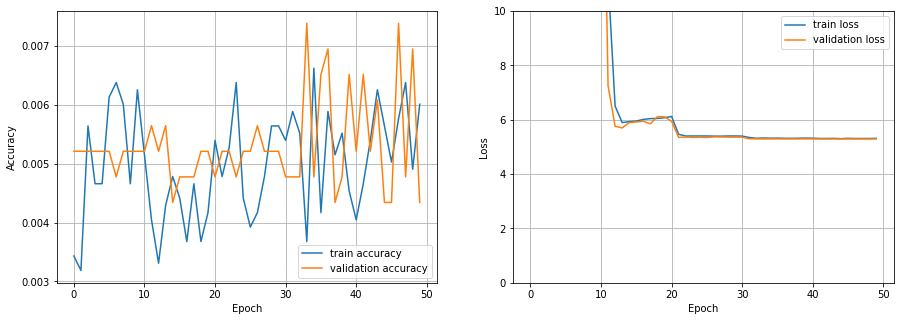

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],  label='train accuracy')
plt.plot(h.history['val_accuracy'],  label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'],  label='train loss')
plt.plot(h.history['val_loss'],  label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.ylim([0,10])
plt.legend(loc='upper right')

plt.savefig ("EfficientNet.pdf",dpi=300)

plt.show()